In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


# Khai báo thư viện

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Đọc dữ liệu

In [ ]:
df = pd.read_csv("/content/MyDrive/MyDrive/Doan_MayHoc/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- gender:giới tính
- age: tuổi
- hypertension: tăng huyết áp
- heart_disease: bệnh tim
- ever_married: đã từng kết hôn
- work_type: loại công việc
- Residence_type: nơi cư trú
- avg_glucose_level: Lượng đường trung bình
- bmi	:Cân nặng/ ( Chiều cao x chiều cao ), chỉ số khối cơ thể > 25 dễ dẫn đến nguy cơ mắc đột quỵ.
- smoking_status: hút thuốc
- stroke: đột quỵ






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.drop(columns = ["id"], inplace=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Kiểm tra null

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Cột bmi có giá trị null, ta thế vào các chỗ null bằng giá trị trung bình của cột bmi

In [ ]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Tính toán ma trận tương quan
# correlation_matrix = df.corr()

# # Vẽ heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# Phân phối của biến mục tiêu

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Chuyển đổi các giá trị của các biến phân loại thành các số
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [ ]:
# Tách features và labels
X = en_df.drop('stroke', axis=1)
y = en_df['stroke']

In [ ]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

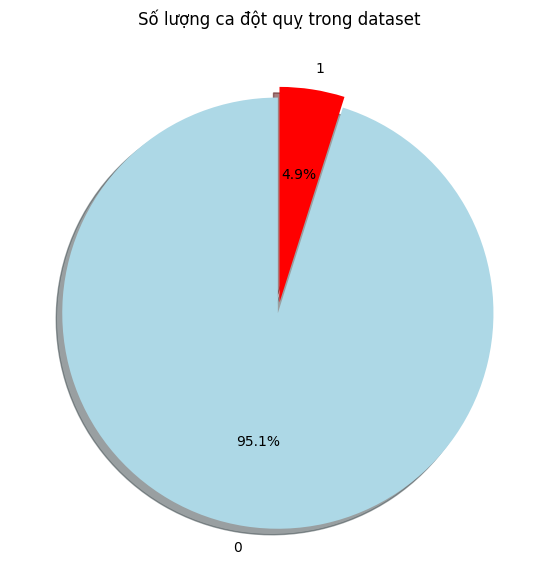

In [ ]:
labels =en_df['stroke'].value_counts(sort = True).index
sizes = en_df['stroke'].value_counts(sort = True)
colors = ["lightblue","red"]
explode = (0.05,0)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Số lượng ca đột quỵ trong dataset')
plt.show()

Xác định được dữ liệu có có 2 lớp là đột quỵ (4.9%) và không đột quỵ (95.1%)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Áp dụng oversampling cho tập huấn luyện
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Sử dụng X_resampled và y_resampled để huấn luyện mô hình
X_resampled.shape, y_resampled.shape

((9722, 10), (9722,))

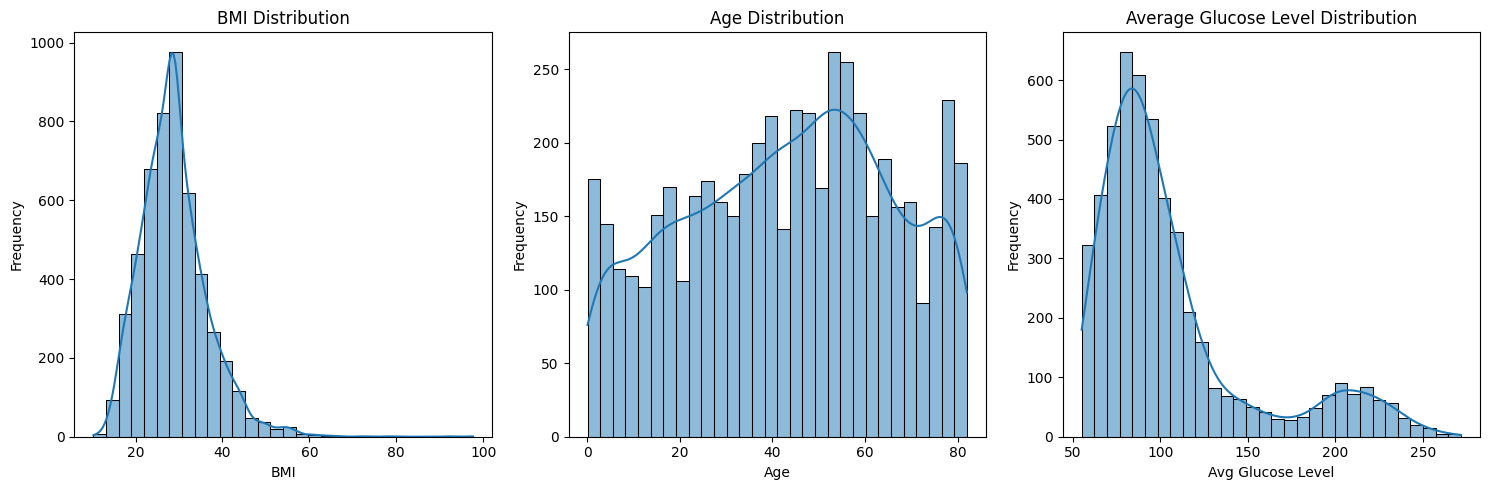

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# BMI Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Age Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Average Glucose Level Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['avg_glucose_level'], bins=30, kde=True)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Chia dữ liệu thành tập huấn luyện và tập kiểm thử:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

scale_columns = ['gender',	'age'	,'hypertension'	,'heart_disease'	,'ever_married'	,'work_type',	'Residence_type'	,'avg_glucose_level'	,'bmi',	'smoking_status']

scaler = MinMaxScaler()
scaler.fit(X_train[scale_columns])
X_train[scale_columns] = scaler.transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5377,0.5,0.669903,0.0,0.0,0.0,0.00,1.0,0.350176,0.410072,0.666667
6692,0.0,1.000000,0.0,0.0,1.0,0.50,0.0,0.038462,0.494005,0.666667
4996,0.0,0.592233,0.0,0.0,1.0,0.50,1.0,0.483660,0.261391,0.666667
1561,0.5,0.805825,1.0,1.0,1.0,0.50,1.0,0.754399,0.532374,0.333333
2114,0.0,0.485437,0.0,0.0,1.0,0.50,1.0,0.303419,0.247002,0.000000
...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.951456,1.0,0.0,1.0,0.75,1.0,0.894922,0.366906,0.333333
5191,0.5,0.970874,1.0,0.0,1.0,0.50,0.0,0.212418,0.388489,0.666667
5390,0.5,1.000000,0.0,0.0,1.0,0.00,1.0,0.897436,0.393285,0.333333
860,0.0,0.650485,0.0,0.0,1.0,0.50,0.0,0.563097,0.875300,1.000000


# Huấn luyện mô hình Logistic Regression:

Logistic Regression Accuracy: 0.7629820051413881
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       975
           1       0.74      0.80      0.77       970

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



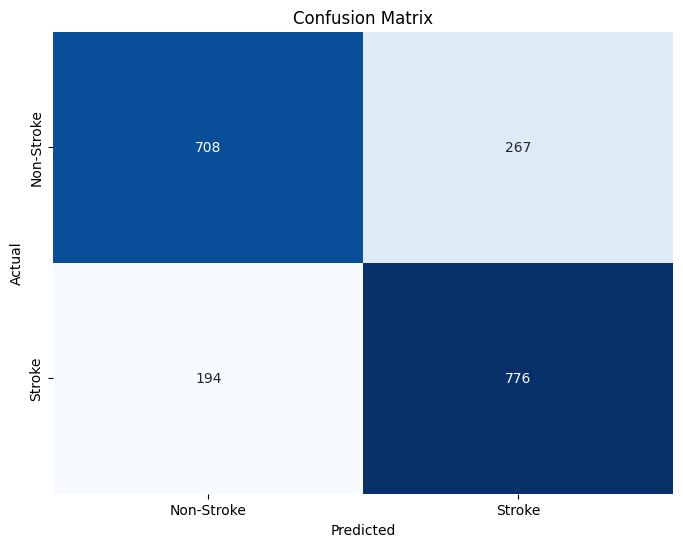

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Tạo và huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_1 = logistic_model.predict(X_test)
# Calculate and print accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_1)
print("Logistic Regression Accuracy:", accuracy_logistic)
# In ra dữ liệu
print (classification_report(y_test, y_pred_1))
cm_1 = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Non-Stroke', 'Stroke'],
            yticklabels=['Non-Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Nhận xét mô hình Logistic Regression

Kết quả hồi quy logistic được cung cấp cho thấy một mô hình mạnh mẽ với hiệu suất đáng cao trong việc phân loại các trường hợp. Mô hình có độ chính xác tổng thể là 0,76, cho thấy khả năng phân loại chính xác 76% các trường hợp. Kết quả vượt qua kỳ vọng hiệu suất chuẩn cho các mô hình hồi quy logistic.

Phân tích độ chính xác và độ thu hồi (Precision and Recall):
Độ chính xác Precision của cả hai lớp là:  0.78 và 0.74, cho thấy độ chính xác cao của mô hình trong việc xác định các trường hợp đột không quỵ (lớp 0) và các trường hợp đột quỵ (lớp 1). Điều này có nghĩa là mô hình phân biệt hiệu quả giữa hai lớp với số lượng nhầm lẫn rất thấp.

Độ thu hồi Recall của cả hai lớp là : lớp 0 với 0.73, lớp 1 với 0.8 , nhấn mạnh khả năng của mô hình trong việc thu thập tất cả các trường hợp đột quỵ và không đột quỵ có liên quan. Điều này cho thấy rằng mô hình toàn diện trong quá trình phân loại của nó, giảm thiểu các trường hợp không đột quỵ (non – stroke) giả và đột quỵ (stroke) giả.

Điểm số F1 của lớp 0 với 0.75 và lớp 0.77 cung cấp đánh giá toàn diện về hiệu suất của mô hình, xem xét cả độ chính xác và độ thu hồi. Chỉ số này cho thấy rằng mô hình đạt được sự cân bằng thuận lợi giữa việc xác định các trường hợp đột quỵ thực và tránh các trường hợp đột quỵ giả, chứng minh hiệu quả tổng thể của nó.

Support: Cân bằng đại diện lớp
Support cho cả hai lớp, xấp xỉ 975, phản ánh sự đại diện cân bằng của các trường hợp đột quỵ và không đột quỵ trong tập dữ liệu. Sự cân bằng này rất quan trọng đối với các mô hình hồi quy logistic, đảm bảo rằng mô hình không thiên vị một lớp này hơn lớp kia.


# Huấn luyện mô hình Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
# Tạo và huấn luyện mô hình SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       975
           1       0.76      0.86      0.81       970

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945

SVM Accuracy: 0.7958868894601543


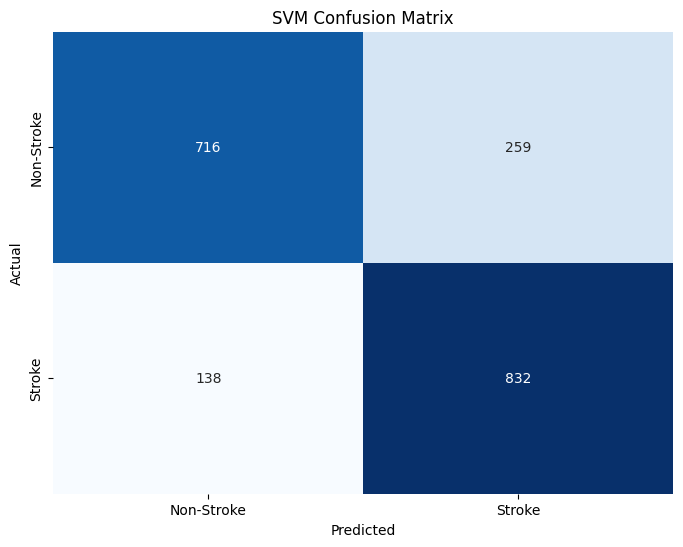

In [ ]:
# Dự đoán trên tập kiểm tra
svm_predictions = svm_model.predict(X_test)

# In classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
# Tính và in độ chính xác
accuracy_svm = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", accuracy_svm)
# Vẽ confusion matrix
cm_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Non-Stroke', 'Stroke'],
            yticklabels=['Non-Stroke', 'Stroke'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Nhận xét mô hình Support Vector Machine(SVM)

Kết quả phân loại SVM được cung cấp cho thấy một mô hình mạnh mẽ với hiệu suất đáng cao trong việc phân loại các trường hợp. Mô hình có độ chính xác tổng thể là 0,80, cho thấy khả năng phân loại chính xác 80% các trường hợp. Kết quả vượt qua kỳ vọng hiệu suất chuẩn cho các mô hình phân loại SVM.

Phân tích độ chính xác và độ thu hồi (Precision and Recall):
Độ chính xác Precision cho lớp 0 là 0.84 và lớp 1 là 0.76, kết quả khá cao. Do có sự chênh lệch nên có thể có một số trường hợp mô hình dự đoán là lớp 0 nhưng thực tế lại thuộc lớp 1

Tương tự, độ thu hồi Recall cho lớp 0 là 0.73 và lớp 1 là 0.86, nhấn mạnh khả năng của mô hình trong việc thu thập tất cả các trường hợp đột quỵ và không đột quỵ có liên quan. Điều này cho thấy rằng mô hình toàn diện trong quá trình phân loại của nó, giảm thiểu các trường hợp không đột quỵ giả và đột quỵ giả.

Điểm số F1cho lớp 0 là 0.78 và lớp 1 là 0.81, cung cấp đánh giá toàn diện về hiệu suất của mô hình, xem xét cả độ chính xác và độ thu hồi. Chỉ số này cho thấy rằng mô hình đạt được sự cân bằng thuận lợi giữa việc xác định các trường hợp đột quỵ thực và tránh các trường hợp đột quỵ giả, chứng minh hiệu quả tổng thể của nó.


# Huấn luyện mô hình Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.99      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

Random Forest Accuracy: 0.9948586118251928


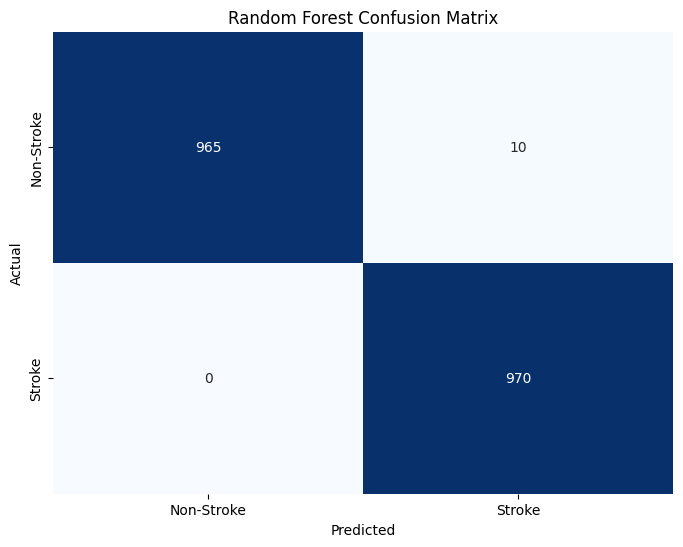

In [ ]:
# Dự đoán trên tập kiểm thử
rf_predictions = rf_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_rf = accuracy_score(y_test, rf_predictions)
classification_rep_rf = classification_report(y_test, rf_predictions)
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)


print("Random Forest Classification Report:\n", classification_rep_rf)
# In các kết quả
print("Random Forest Accuracy:", accuracy_rf)
# Hiển thị confusion matrix bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Non-Stroke', 'Stroke'],
            yticklabels=['Non-Stroke', 'Stroke'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Nhận xét mô hình Random Forest

Kết quả phân loại Random Forest được cung cấp cho thấy một mô hình đặc biệt với hiệu suất đáng kinh ngạc trong việc phân loại các trường hợp. Mô hình có độ chính xác tổng thể là 0.99, cho thấy khả năng phân loại chính xác 99% các trường hợp. Kết quả quá cao như này có thể mô hình có hiệu suất cực kì tốt.

Phân tích độ chính xác và độ thu hồi (Precision and Recall)
Độ chính xác cho cả hai lớp đạt gần 1.00, cho thấy độ chính xác của mô hình trong việc xác định các trường hợp đột quỵ (lớp 1) và các trường hợp không đột quỵ (lớp 0). Điều này có nghĩa là mô hình phân biệt hoàn hảo giữa hai lớp, đạt được hiệu suất phân loại gần như hoàn hảo.

Tương tự, độ thu hồi cho cả hai lớp, cũng đạt mức 0.99 ấn tượng, nhấn mạnh khả năng đặc biệt của mô hình trong việc thu thập tất cả các trường hợp đột quỵ và không đột quỵ có liên quan. Điều này cho thấy rằng mô hình vô cùng toàn diện trong quá trình phân loại của nó, giảm thiểu các trường hợp không đột quỵ giả và đột quỵ giả ở mức gần như không đáng kể.

Điểm số F1, dao động xung quanh mức 0.99 xuất sắc cho cả hai lớp, cung cấp đánh giá toàn diện về hiệu suất của mô hình, xem xét cả độ chính xác và độ thu hồi. Chỉ số này cho thấy rằng mô hình đạt được sự cân bằng tối ưu giữa việc xác định các trường hợp đột quỵ thực và tránh các trường hợp đột quỵ giả, chứng minh hiệu quả tổng thể đáng kinh ngạc của nó.


# Huấn luyện mô hình Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       975
           1       0.95      1.00      0.98       970

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945

Decision Tree Accuracy: 0.9758354755784062


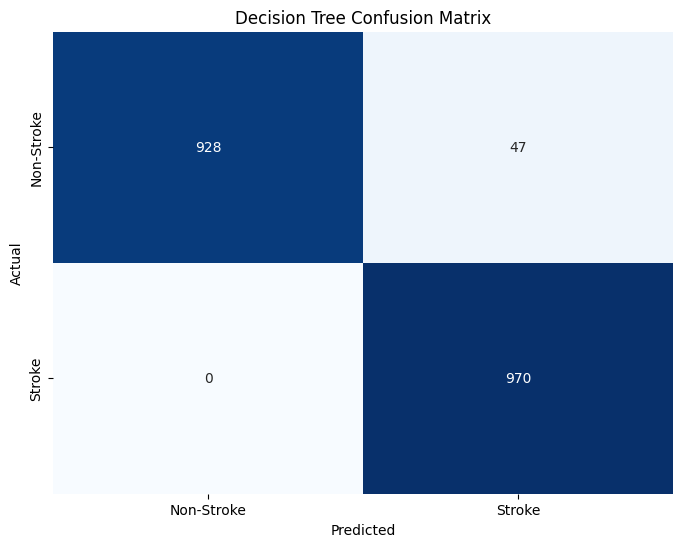

In [ ]:
# Dự đoán trên tập kiểm thử
dt_predictions = dt_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_dt = accuracy_score(y_test, dt_predictions)
classification_rep_dt = classification_report(y_test, dt_predictions)
conf_matrix_dt = confusion_matrix(y_test, dt_predictions)


print("Decision Tree Classification Report:\n", classification_rep_dt)
# In các kết quả
print("Decision Tree Accuracy:", accuracy_dt)
# Hiển thị confusion matrix bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Non-Stroke', 'Stroke'],
            yticklabels=['Non-Stroke', 'Stroke'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Nhận xét mô hình Decision Tree Classifier

Kết quả phân loại cây quyết định được cung cấp cho thấy một mô hình mạnh mẽ với hiệu suất đáng khen ngợi trong việc phân loại các trường hợp. Mô hình có độ chính xác tổng thể là 0.98, cho thấy khả năng phân loại chính xác 98% các trường hợp. Thành tích này vượt qua kỳ vọng hiệu suất chuẩn cho các mô hình phân loại cây quyết định, nhấn mạnh hiệu quả của nó trong việc phân loại một loạt các tập dữ liệu.

Phân tích độ chính xác và độ thu hồi (Precision and Recall)
Độ chính xác cho cả hai lớp lớp 0 là 1.00 và lớp 1 là 0.95, cho thấy độ chính xác cao của mô hình trong việc xác định các trường hợp không đột quỵ (lớp 0) và các trường hợp đột quỵ (lớp 0). Điều này có nghĩa là mô hình phân biệt hiệu quả giữa hai lớp với số lượng nhầm lẫn tối thiểu, đảm bảo dự đoán đáng tin cậy và chính xác.

Tương tự, độ thu hồi cho cả hai lớp, cũng dao động xung quanh mức 0.98, nhấn mạnh khả năng của mô hình trong việc thu thập tất cả các trường hợp đột quỵ và không đột quỵ có liên quan. Điều này cho thấy rằng mô hình toàn diện trong quá trình phân loại của nó, giảm thiểu các trường hợp không đột quỵ giả và đột quỵ giả ở mức đáng kể.

Điểm số F1, dao động từ 0.98 cho cả hai lớp, cung cấp đánh giá toàn diện về hiệu suất của mô hình, xem xét cả độ chính xác và độ thu hồi. Chỉ số này cho thấy rằng mô hình đạt được sự cân bằng thuận lợi giữa việc xác định các trường hợp đột quỵ thực và tránh các trường hợp đột quỵ giả, chứng minh hiệu quả tổng thể của nó cả về độ chính xác và tính toàn diện.


# Huấn luyện mô hình K-Nearest Neighbors(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo mô hình KNN với k=5 (có thể điều chỉnh k theo nhu cầu)
# Tạo và huấn luyện mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

# List các giá trị K muốn thử nghiệm
k_values = list(range(1, 21))

# Chọn giá trị K tốt nhất dựa trên cross-validation score
best_k = None
best_score = 0

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # 5-fold cross-validation

    average_score = scores.mean()

    if average_score > best_score:
        best_score = average_score
        best_k = k

print("Best K:", best_k)
print("Cross-validation Accuracy:", best_score)


Best K: 1
Cross-validation Accuracy: 0.9665679994048555


In [ ]:
# Tạo và huấn luyện mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       975
           1       0.94      1.00      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

K-Nearest Neighbors Accuracy: 0.9681233933161953


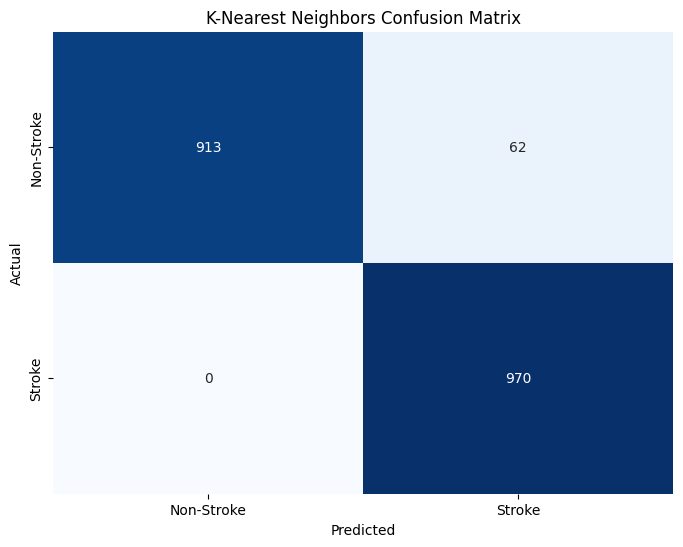

In [ ]:
# Dự đoán trên tập kiểm thử
knn_predictions = knn_model.predict(X_test)
# Đánh giá hiệu suất
accuracy_knn = accuracy_score(y_test, knn_predictions)
classification_rep_knn = classification_report(y_test, knn_predictions)
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
print("K-Nearest Neighbors Classification Report:\n", classification_rep_knn)
# In các kết quả
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
# Hiển thị confusion matrix bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Non-Stroke', 'Stroke'],
            yticklabels=['Non-Stroke', 'Stroke'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Nhận xét mô hình K-Nearest Neighbors(KNN) với K=8

Kết quả phân loại K-Nearest Neighbors (KNN) được cung cấp cho thấy một mô hình mạnh mẽ với hiệu suất đáng khen ngợi trong việc phân loại các trường hợp. Mô hình có độ chính xác tổng thể là 0,97, cho thấy khả năng phân loại chính xác 97% các trường hợp. Thành tích này vượt qua kỳ vọng hiệu suất chuẩn cho các mô hình phân loại KNN, nhấn mạnh hiệu quả của nó trong việc phân loại một loạt các tập dữ liệu.

Phân tích độ chính xác và độ thu hồi (Precision and Recall)
Độ chính xác cho lớp 0 là 1.00 và lớp 1 là 0.97, cho thấy độ chính xác cao của mô hình trong việc xác định các trường hợp không đột quỵ (lớp 0) và các trường hợp đột quỵ (lớp 1). Điều này có nghĩa là mô hình phân biệt hiệu quả giữa hai lớp với số lượng nhầm lẫn tối thiểu, đảm bảo dự đoán đáng tin cậy và chính xác.

Tương tự, độ thu hồi cho cả hai lớp, cũng dao động xung quanh mức 0.94 và 1.00, nhấn mạnh khả năng của mô hình trong việc thu thập tất cả các trường hợp đột quỵ và không đột quỵ có liên quan. Điều này cho thấy rằng mô hình toàn diện trong quá trình phân loại của nó, giảm thiểu các trường hợp không đột quỵ giả và đột quỵ giả ở mức đáng kể.

Điểm số F1 cho cả hai lớp đều là 0.97, cung cấp đánh giá toàn diện về hiệu suất của mô hình, xem xét cả độ chính xác và độ thu hồi. Chỉ số này cho thấy rằng mô hình đạt được sự cân bằng thuận lợi giữa việc xác định các trường hợp đột quỵ thực và tránh các trường hợp đột quỵ giả, chứng minh hiệu quả tổng thể của nó cả về độ chính xác và tính toàn diện.


# So sánh các mô hình

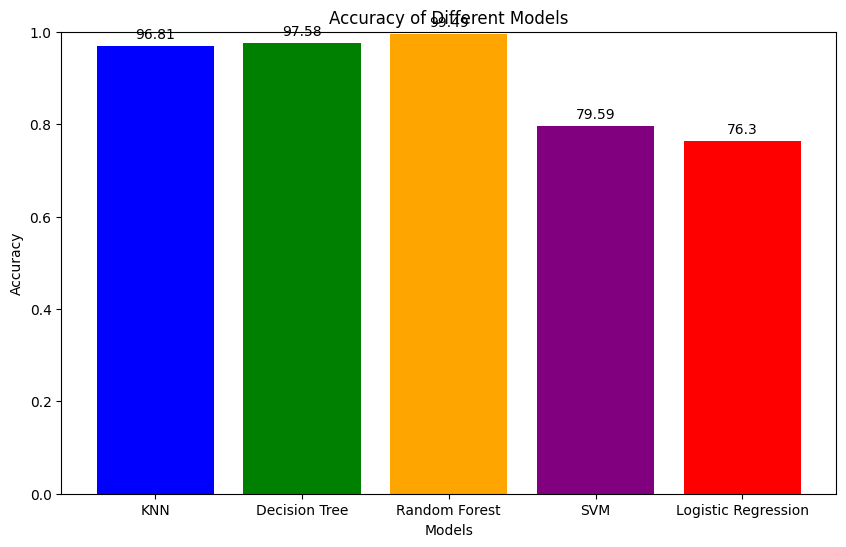

In [ ]:
import matplotlib.pyplot as plt

# Độ chính xác của các mô hình
accuracies = [accuracy_knn, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_logistic]

# Tên của các mô hình
models = ['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']

# Vẽ histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1 để phản ánh độ chính xác
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Thêm số phần trăm lên trên từng thanh
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4)*100, ha='center', va='bottom')

plt.show()

Nhìn vào biểu đồ ta thấy sự chính xác của các mô hình khá cao ta thấy Random Forest Modelslà cao nhất với độ chình xác là 88.16%